Kích thước đặc trưng: torch.Size([64, 1, 28, 28])
Số nhãn: torch.Size([64])


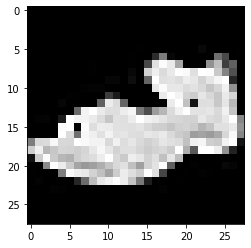

Nhãn: 5


In [5]:
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data", # Lưu dữ liệu vào thư mục có tên data.
    train=True, # Bộ dữ liệu training.
    download=True,
    transform=ToTensor() # Sau khi ảnh được đọc xong chúng ta có thể chuyển dữ liệu về dạng Tensor.
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False, # Bộ dữ liệu test.
    download=True,
    transform=ToTensor()
)

# Khởi tạo DataLoader cho bộ dữ liệu training.
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)

# Khởi tạo DataLoader cho bộ dữ liệu test
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# Lấy ra kích thước đặc trưng các quan sát và số nhãn trong bó
train_features, train_labels = next(iter(train_dataloader))
print(f"Kích thước đặc trưng: {train_features.size()}")
print(f"Số nhãn: {train_labels.size()}")

# Truy cập vào phần tử đầu tiên trong train_features, và loại bỏ bớt 1 chiều đến biến quan sát thành ảnh.
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Nhãn: {label}")


In [4]:
train_features.shape

torch.Size([64, 1, 28, 28])

In [4]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import time
from collections import Counter

learning_rate = 1e-3
batch_size = 64
epochs = 5

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [5]:
# Count the number of observations for each class
def count_classes(dataset):
    class_counts = Counter()
    for _, label in dataset:
        class_counts[label] += 1
    return class_counts

# Get the class counts for training and test datasets
training_class_counts = count_classes(training_data)
test_class_counts = count_classes(test_data)

# Print the results
print("Training Data Class Counts:")
for class_idx, count in training_class_counts.items():
    print(f"Class {class_idx}: {count}")

print("\nTest Data Class Counts:")
for class_idx, count in test_class_counts.items():
    print(f"Class {class_idx}: {count}")

Training Data Class Counts:
Class 9: 6000
Class 0: 6000
Class 3: 6000
Class 2: 6000
Class 7: 6000
Class 5: 6000
Class 1: 6000
Class 6: 6000
Class 4: 6000
Class 8: 6000

Test Data Class Counts:
Class 9: 1000
Class 2: 1000
Class 1: 1000
Class 6: 1000
Class 4: 1000
Class 5: 1000
Class 7: 1000
Class 3: 1000
Class 8: 1000
Class 0: 1000


In [2]:
training_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [1]:


train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN()



/home/vuluong/anaconda3/envs/machine_learning/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1631630836880/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [2]:
print(model)

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [18]:
def train_loop(dataloader, model, loss_fn, optimizer):
    n_samples = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # import pdb
        # pdb.set_trace()
        make_dot(loss, params=dict(model.named_parameters()))

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss_item, current = loss.item(), batch * len(X)
            print(f"Mất mát huấn luyện: {loss_item:>7f}  [{current:>5d}/{n_samples:>5d}]")

def test_loop(dataloader, model, loss_fn):
    n_samples = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= n_samples
    print(f"Tỉ lệ dự đoán chính xác: {(100*correct):>0.1f}%, mất mát trung bình: {test_loss:>8f} \n")

In [19]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [20]:
print(loss_fn)

CrossEntropyLoss()


In [21]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

total_train_time = 0
total_test_time = 0
for t in range(epochs):
    print(f"Chu kỳ huấn luyện {t+1}\n-------------------------------")
    start_time_seconds = time.time()
    train_loop(train_dataloader, model, loss_fn, optimizer)
    end_time_seconds = time.time()
    total_train_time += end_time_seconds - start_time_seconds
    start_time_seconds = time.time()
    test_loop(test_dataloader, model, loss_fn)
    end_time_seconds = time.time()
    total_test_time += end_time_seconds - start_time_seconds
print("Hoàn thành!")
print("Thời gian huấn luyện mô hình: " + str(total_train_time) + ' giây')
print("Thời gian dự đoán kết quả trên bộ dữ liệu kiểm thử: " + str(total_test_time/epochs) + ' giây')

torch.save(model.state_dict(), "model.pth")


Chu kỳ huấn luyện 1
-------------------------------
Mất mát huấn luyện: 2.298908  [    0/60000]
Mất mát huấn luyện: 0.599013  [ 6400/60000]
Mất mát huấn luyện: 0.581856  [12800/60000]
Mất mát huấn luyện: 0.412528  [19200/60000]
Mất mát huấn luyện: 0.553589  [25600/60000]


KeyboardInterrupt: 

In [ ]:
pred = f(w1, w2, w3...) = w1 * a1 + w2 * a2 + ...
loss = loss_fn(pred, y) = loss_fn(w1 * a2 + w2 * a2..., y)

dLoss / dw1
dLoss / dw2...

loss.backward() --> w1.grad = ?, w2.grad = ?,...

optimizer.step() --> w1 = w1 - lr * w1.grad,...

In [16]:
from torchviz import make_dot

In [ ]:
make_dot(y1, params=dict(net.named_parameters()))

In [10]:
import numpy as np
learning_rate = 0.1
x = np.random.rand()
for iter in range(100):
    x = x - learning_rate*(2*x - 2)
    print(x)


0.5374307976221763
0.629944638097741
0.7039557104781928
0.7631645683825543
0.8105316547060435
0.8484253237648348
0.8787402590118678
0.9029922072094942
0.9223937657675954
0.9379150126140763
0.950332010091261
0.9602656080730088
0.968212486458407
0.9745699891667255
0.9796559913333804
0.9837247930667044
0.9869798344533635
0.9895838675626908
0.9916670940501526
0.9933336752401221
0.9946669401920977
0.9957335521536781
0.9965868417229424
0.9972694733783539
0.9978155787026831
0.9982524629621465
0.9986019703697172
0.9988815762957738
0.999105261036619
0.9992842088292953
0.9994273670634362
0.999541893650749
0.9996335149205992
0.9997068119364794
0.9997654495491834
0.9998123596393468
0.9998498877114774
0.999879910169182
0.9999039281353456
0.9999231425082764
0.9999385140066211
0.9999508112052969
0.9999606489642375
0.9999685191713901
0.9999748153371121
0.9999798522696897
0.9999838818157517
0.9999871054526014
0.9999896843620811
0.9999917474896649
0.9999933979917319
0.9999947183933855
0.9999957747147084

In [21]:
class Adam:
    def __init__(self, lr=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.t = 0
        self.m = 0
        self.v = 0
    
    def step(self, gradient):
        self.t += 1
        # Tính đạo hàm trung bình
        self.m = self.beta1 * self.m + (1 - self.beta1) * gradient

        # Tính trung bình bình phương đạo hàm
        self.v = self.beta2 * self.v + (1 - self.beta2) * (gradient ** 2)
        
        # Biến đổi tỉ số cập nhật
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        
        # Cập nhật trọng số
        x_update = -self.lr * m_hat / (v_hat ** 0.5 + self.epsilon)
        
        return x_update

# Khởi tạo Adam optimizer
optimizer = Adam(lr=0.005)

# Khởi tạo giá trị ban đầu cho x
x = np.random.rand()  # Bạn có thể thử nghiệm với các giá trị khác nhau
num_iterations = 100  # Số lượng vòng lặp
tolerance = 1e-6  # Ngưỡng dừng khi sự thay đổi nhỏ

# Tiến hành quá trình tối ưu hóa
for _ in range(num_iterations):
    # Tính gradient
    gradient = 2 * x - 2  # Đạo hàm của hàm số
    
    # Sử dụng Adam optimizer để cập nhật giá trị của x
    x_update = optimizer.step(gradient)
    x += x_update
    print("Bước", optimizer.t, ":", x)
    
    # Kiểm tra ngưỡng dừng
    if abs(x_update) < tolerance:
        break

print("Giá trị tối ưu của x:", x)


Bước 1 : 0.9483451844536077
Bước 2 : 0.9533278440625425
Bước 3 : 0.9582789108673582
Bước 4 : 0.9631817727104064
Bước 5 : 0.968017193964792
Bước 6 : 0.9727630911238845
Bước 7 : 0.9773943924551118
Bước 8 : 0.9818830411565445
Bước 9 : 0.9861982141198347
Bước 10 : 0.9903068324620686
Bước 11 : 0.9941744272454711
Bước 12 : 0.9977663864662416
Bước 13 : 1.0010495449223362
Bước 14 : 1.0039939954909358
Bước 15 : 1.0065749210101822
Bước 16 : 1.0087742013305852
Bước 17 : 1.0105815655734185
Bước 18 : 1.01199513889084
Bước 19 : 1.0130213520157718
Bước 20 : 1.0136742995939934
Bước 21 : 1.0139747127546304
Bước 22 : 1.0139487363489175
Bước 23 : 1.0136266786439856
Bước 24 : 1.0130418513550774
Bước 25 : 1.0122295621286985
Bước 26 : 1.0112262745499006
Bước 27 : 1.0100689186398955
Bước 28 : 1.0087943176864018
Bước 29 : 1.007438692157884
Bước 30 : 1.0060372047827546
Bước 31 : 1.0046235194957924
Bước 32 : 1.0032293584624772
Bước 33 : 1.0018840539120937
Bước 34 : 1.0006141034190696
Bước 35 : 0.999442747056975